## Name: Joshua Krachman, Email: jkrachm2@jhu.edu, Github: jkrachm2
# Quiz3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
sns.set()

! if [ ! -e oasis.csv ]; \
then wget https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Master%20Repo/ds4bme_intro-master/data/orings.csv; \
fi;

dat = pd.read_csv("https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Master%20Repo/ds4bme_intro-master/data/orings.csv")

--2020-03-23 22:15:43--  https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Master%20Repo/ds4bme_intro-master/data/orings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357 [text/plain]
Saving to: ‘orings.csv’

orings.csv          100%[===================>]     357  --.-KB/s    in 0s      

2020-03-23 22:15:43 (80.3 MB/s) - ‘orings.csv’ saved [357/357]



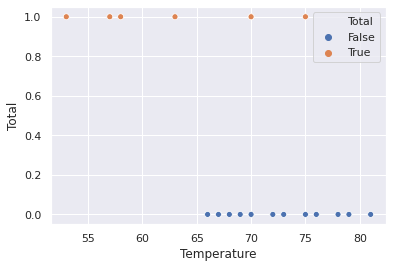

In [2]:
#a
sns.scatterplot(dat['Temperature'], dat['Total']>0, hue=dat['Total']>0)

In [0]:
x = dat[['Temperature']]
y= dat['Total']>0

In [4]:
#b

lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs') 
fit = lr.fit(x, y)
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

[14.861927086730814, -0.22950051284078993]

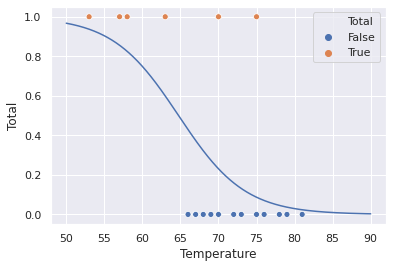

In [5]:
#c

n = 1000
xplot = np.linspace(50, 90, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.scatterplot(dat['Temperature'], dat['Total']>0, hue=dat['Total']>0)
sns.lineplot(xplot, p)

In [6]:
#d

yhat74 = 1 / (1 + np.exp(-beta0-beta1*74))
print ("The estimated probabaility of failure given a temperature of 74 degrees is", yhat74)

The estimated probabaility of failure given a temperature of 74 degrees is 0.107061826026118


### Proof for Number 2

#Starting a....

$ P(Y_i = 1 | X_i) = \frac{e^{(\beta_0 (1 - X_i) + \beta_1 X_i)}}{1 + e^{(\beta_0 (1 - X_i) + \beta_1 X_i)}}$

$ P(\vec{Y} = \vec{y} | \vec{X}) = \prod\limits_{i = 1}^{n} (\frac{e^{(\beta_0 (1 - X_i) + \beta_1 X_i)}}{1 + e^{(\beta_0 (1 - X_i) + \beta_1 X_i)}})^{y_i} (\frac{1}{1 + e^{(\beta_0 (1 - X_i) + \beta_1 X_i)}})^{(1 - y_i)} 
= \prod\limits_{i = 1}^{n} (e^{(\beta_0 (1 - X_i) + \beta_1 X_i)})^{y_i} (1 + e^{(\beta_0 (1 - X_i) + \beta_1 X_i)})^{-1} $

$ log{(P(\vec{Y} = \vec{y} | \vec{X}))} = \sum\limits_{i = 1}^{n} y_i(\beta_0 (1 - X_i) + \beta_1 X_i) - \sum\limits_{i = 1}^{n} log{(1 + e^{(\beta_0 (1 - X_i) + \beta_1 X_i)})} $

#Starting b....
#Because $ X_i = 0 $ when $ i \in G_0 $ and $ X_i = 1 $ when $ i \in G_1 $:


$ log{(P(\vec{Y} = \vec{y} | \vec{X}))} = (\sum\limits_{i \in G_0} \beta_0 y_i + \sum\limits_{i \in G_1} \beta_1 y_i) - (\sum\limits_{i \in G_0} log{(1 + e^{\beta_0})} + \sum\limits_{i \in G_1} log{(1 + e^{\beta_1})}) $

$ log{(P(\vec{Y} = \vec{y} | \vec{X}))} = (\sum\limits_{i \in G_0} \beta_0 y_i - \sum\limits_{i \in G_0} log{(1 + e^{\beta_0})}) + (\sum\limits_{i \in G_1} \beta_1 y_i - \sum\limits_{i \in G_1} log{(1 + e^{\beta_1})}) $

#Starting c....

$ log{(P(\vec{Y} = \vec{y} | \vec{X}))} = (n_0 \beta_0 \bar y_0 - n_0 log{(1 + e^{\beta_0})}) + (n_1 \beta_1 \bar y_1 - n_1 log{(1 + e^{\beta_1})}) $


In $ G_0 $, where $ x_i = 0 $:


$ \frac{\partial }{\partial \beta_0} (n_0 \beta_0 \bar y_0 - n_0 log{(1 + e^{\beta_0})}) = 0 $

$ n_0 \bar y_0 - \frac{n_0 e^{\beta_0}}{1 + e^{\beta_0}} = 0 $

$ n_0 \bar y_0 = \frac{n_0 e^{\beta_0}}{1 + e^{\beta_0}} $

$ \bar y_0 = \frac{e^{\beta_0}}{1 + e^{\beta_0}} $

$ \hat\beta_0 = log{(\frac{\bar y_0}{1 - \bar y_0})} $

In $ G_1 $, where $ x_i = 1 $:

$ \frac{\partial }{\partial \beta_1} (n_1 \beta_1 \bar y_1 - n_1 log{(1 + e^{\beta_1})}) = 0 $

$ n_1 \bar y_1 - \frac{n_1 e^{\beta_1}}{1 + e^{\beta_1}} = 1 $

$ n_1 \bar y_1 = \frac{n_1 e^{\beta_1}}{1 + e^{\beta_1}} $

$ \bar y_1 = \frac{e^{\beta_1}}{1 + e^{\beta_1}} $

$ \hat\beta_1 = log{(\frac{\bar y_1}{1 - \bar y_1})} $

In [7]:
#3

## Download in the data if it's not already there
! if [ ! -e oasis.csv ]; \
then wget https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Class%20Final%20Project/RCQ_batted_ball.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Class%20Final%20Project/RCQ_batted_ball.csv")

dat.head(10)

--2020-03-23 22:15:46--  https://raw.githubusercontent.com/jkrachm2/Data-Science/master/Class%20Final%20Project/RCQ_batted_ball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 957545 (935K) [text/plain]
Saving to: ‘RCQ_batted_ball.csv’

RCQ_batted_ball.csv 100%[===================>] 935.10K  --.-KB/s    in 0.1s    

2020-03-23 22:15:48 (7.21 MB/s) - ‘RCQ_batted_ball.csv’ saved [957545/957545]



,hc_x,hc_y,next_event_type,event_and_next_event_type,event_description,batter_name,pitcher_name,outs,balls,strikes,hit_trajectory,fld_score,bat_score,post_fld_score,post_bat_score,is_hit_into_play,is_hit_into_play_basehit,bat_side,pitch_hand,sport_id,game_pk,at_bat_number,event_inning,top_inning_sw,game_date
0,138.03,75.69,field_out,field_out,Marcus Chiu flies out to center fielder Jordyn...,Marcus Chiu,Travis Herrin,0,0,0,fly_ball,5,1,5,1,1,0,R,R,13,576754.0,39,5,N,2019-08-31
1,207.14,139.24,field_out,field_out,Brayan Morales flies out to right fielder Spen...,Brayan Morales,Austin Krzeminski,0,0,0,fly_ball,5,1,5,1,1,0,R,R,13,576754.0,60,8,N,2019-08-31
2,44.29,95.55,double,double,Brandon Montgomery doubles (5) on a sharp grou...,Brandon Montgomery,Travis Herrin,1,1,0,ground_ball,5,1,5,1,1,1,R,R,13,576754.0,40,5,N,2019-08-31
3,144.38,164.66,field_out,field_out,Jeren Kendall pops out to second baseman Leona...,Jeren Kendall,Austin Krzeminski,2,0,0,popup,5,1,5,1,1,0,L,R,13,576754.0,62,8,N,2019-08-31
4,108.64,174.99,field_out,field_out,"Jacob Amaya grounds out, third baseman Zane Gu...",Jacob Amaya,Travis Herrin,1,0,0,ground_ball,1,0,1,0,1,0,R,R,13,576754.0,6,1,N,2019-08-31
5,133.26,87.61,single,single,Tre Todd singles on a line drive to center fie...,Tre Todd,Travis Herrin,0,3,2,line_drive,1,0,1,0,1,1,L,R,13,576754.0,18,3,N,2019-08-31
6,NaN,NaN,NaN,strikeout,Starling Heredia strikes out swinging.,Starling Heredia,Travis Herrin,2,2,2,NaN,5,1,5,1,0,0,R,R,13,576754.0,50,6,N,2019-08-31
7,116.58,155.92,field_out,field_out,"Brandon Montgomery grounds out, shortstop Mich...",Brandon Montgomery,Travis Herrin,0,2,0,ground_ball,1,0,1,1,1,0,R,R,13,576754.0,20,3,N,2019-08-31
8,189.66,97.93,field_out,field_out,Jacob Amaya flies out to right fielder Spencer...,Jacob Amaya,Travis Herrin,2,0,0,fly_ball,1,1,1,1,1,0,R,R,13,576754.0,22,3,N,2019-08-31
9,108.64,180.55,force_out,force_out,"Starling Heredia grounds into a force out, thi...",Starling Heredia,Austin Krzeminski,1,2,2,ground_ball,5,1,5,1,1,0,R,R,13,576754.0,69,9,N,2019-08-31
